In [1]:
# Importing the pandas library and assigning it the alias 'pd'
# Importing the numpy library and assigning it the alias 'np'
# Importing the pyplot module from matplotlib and assigning it the alias 'plt'
# Importing the seaborn library and assigning it the alias 'sns'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the Titanic dataset CSV file into a pandas DataFrame
df=pd.read_csv("/content/Titanic-Dataset.csv")

# Displaying the contents of the DataFrame
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Getting the number of rows and columns in the DataFrame

df.shape

(891, 12)

In [4]:
# Retrieving the column labels of the DataFrame

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Counting the number of duplicate rows in the DataFrame

df.duplicated().sum()

np.int64(0)

In [6]:
# Counting and sorting the number of missing values per column in descending order

df.isnull().sum().sort_values(ascending=False)


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [7]:
# Dropping the 'Cabin' column from the DataFrame in place

df.drop("Cabin",axis=1,inplace=True)

The Cabin column is dropped because it contains over 70% missing values, making it unreliable for analysis or imputation without introducing significant bias.


In [8]:
# Iterating over each column in the DataFrame
for i in df:
  if df[i].dtypes!="O":                     # Checking if the column's data type is not object
    df[i]=df[i].fillna(df[i].median())      # Filling missing values in the numeric column with its median
  else:                                     # Else, for categorical columns
   df[i]= df[i].fillna(df[i].mode()[0])     # Filling missing values in the categorical column with its mode

In [9]:
# Counting and sorting the number of missing values per column

df.isnull().sum().sort_values(ascending=False)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
# Displaying the data types of each column in the DataFrame

df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [11]:
# Generating descriptive statistics for the DataFrame, including count, mean, std, min, 25%, 50%, 75%, and max for numeric columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualization

Class-wise Passenger Count Segmented by Gender

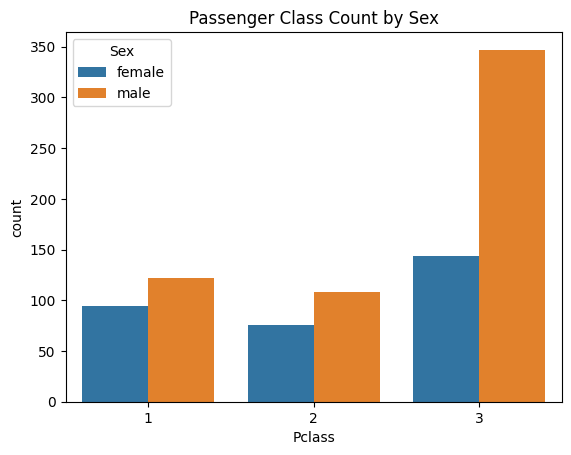

In [12]:
# Creating a count plot to visualize the distribution of passengers across different passenger classes

sns.countplot(x='Pclass',hue="Sex",data=df)
plt.title('Passenger Class Count by Sex')
plt.show()


Most of the passengers in 3rd class were male, while the higher classes (1st and 2nd) had a more balanced distribution between male and female passengers.

Gender-wise Passenger Count

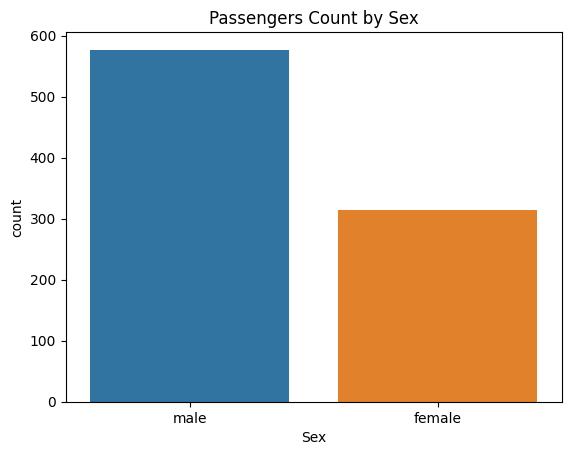

In [13]:
# Creating a Scount plot to visualize the distribution of passengers by sex
sns.countplot(x='Sex', data=df,hue="Sex")
plt.title('Passengers Count by Sex')
plt.show()

There are significantly more male passengers compared to female passengers on the Titanic.

Specifically, the male count is almost double the female count.

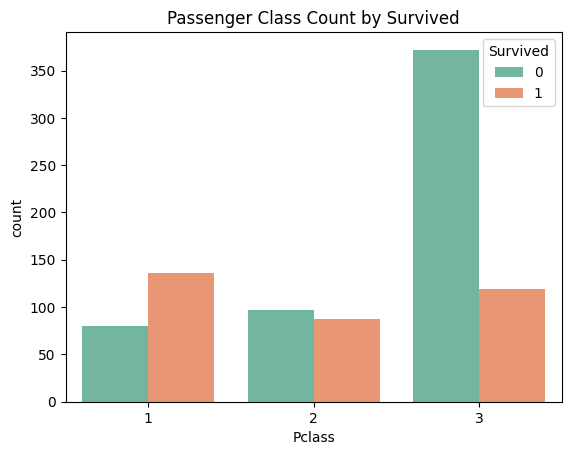

In [14]:
# Creating a count plot to visualize the distribution of passengers servival across different classes
sns.countplot(x="Pclass",hue="Survived",data=df, palette="Set2")
plt.title("Passenger Class Count by Survived")
plt.show()

Insight from the graph:

First class (Pclass 1) had a higher survival rate (more survivors than non-survivors).

Second class (Pclass 2) shows nearly balanced survival vs. non-survival.

Third class (Pclass 3) had many more non-survivors compared to survivors.

Overall takeaway:

Survival chances were strongly linked to passenger class, with first-class passengers having a much better chance of survival compared to those in third class.

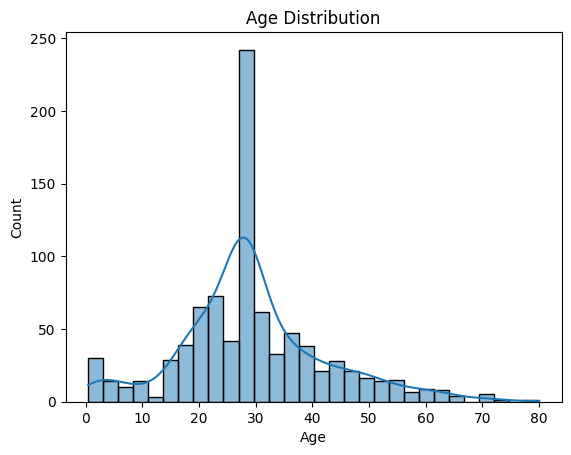

In [15]:
# Creating a histogram to visualize the distribution of passengers' ages
sns.histplot(x="Age",data=df,kde=True)
plt.title("Age Distribution")
plt.show()

Insight from the Age Distribution:

Most passengers were between 20 and 40 years old, with a sharp peak around 28–30 years.

There’s a noticeable number of children (0–10 years) but fewer older passengers above 60 years.

The distribution is right-skewed, meaning there were fewer older passengers compared to younger ones.

Overall takeaway:

The Titanic passenger population was mostly young adults, with relatively few elderly travelers.

Survival Rate by Gender

In [16]:
# Calculating the mean survival rate for each gender (Sex) group
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Survival Rate by Passenger Class

In [17]:
df.groupby("Pclass")["Survived"].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [18]:
# Identifying columns with numeric data types (int64 or float64) in the DataFrame

num = [col for col in df if df[col].dtype in ['int64', 'float64']]


In [19]:
num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

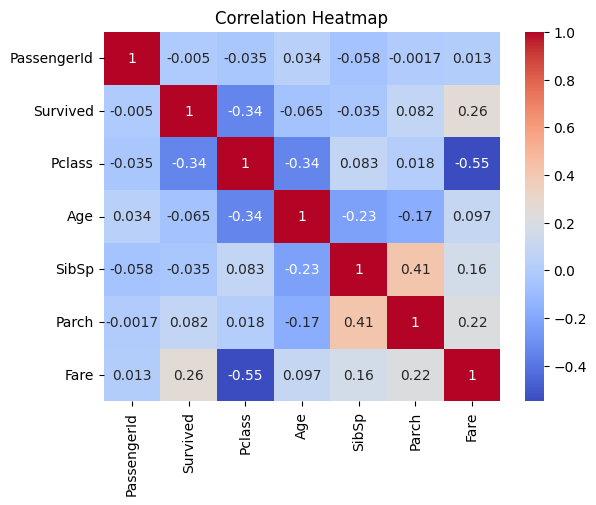

In [20]:
# Creating a heatmap to visualize the correlation matrix of numeric features in the DataFrame

sns.heatmap(df[num].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Looping through each column and printing its name and unique values if the column has 5 or fewer unique entries

for i in df:
  if df[i].nunique()<=5:
    print(i," : ",df[i].unique())
    print()

Survived  :  [0 1]

Pclass  :  [3 1 2]

Sex  :  ['male' 'female']

Embarked  :  ['S' 'C' 'Q']



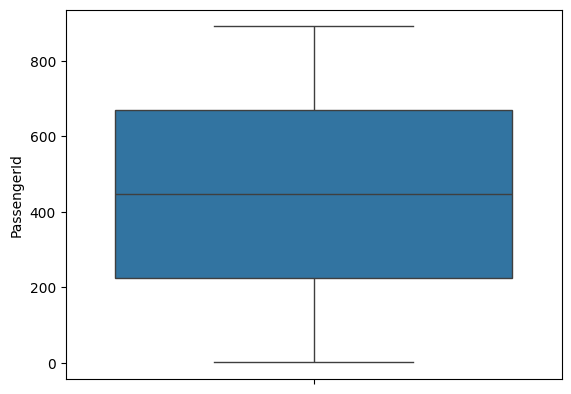

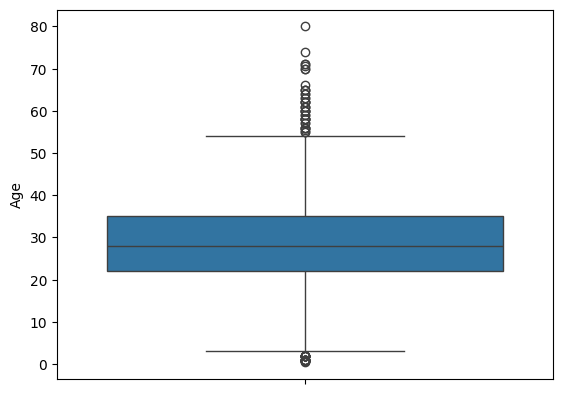

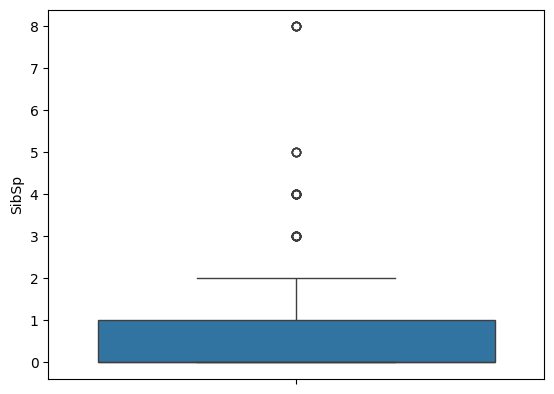

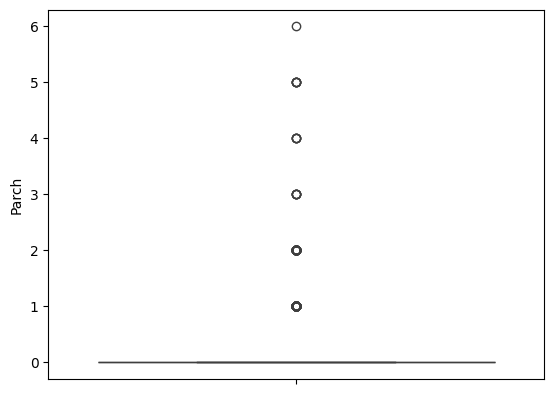

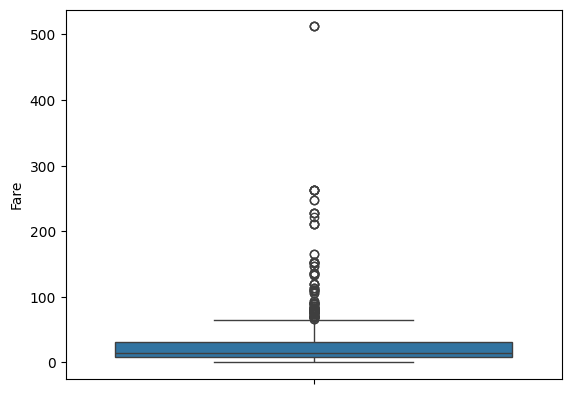

In [22]:
for i in df:
  if df[i].dtypes!="O" and df[i].nunique()>5:
    plt.figure()
    sns.boxplot(df,y=i)

In [23]:
df.shape

(891, 11)

In [24]:
# Create a copy of the original DataFrame to preserve the original data before making changes

df1=df.copy()

In [25]:
# Loop through each numerical column and remove rows with outlier values based on the IQR method
# Finally, print the shape of the DataFrame after all outliers have been removed

for i in num:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  ur=q3+(1.5*iqr)
  lr=q1-(1.5*iqr)
  df1=df1[(df1[i]>=lr) &  (df1[i]<=ur)]
print(df1.shape)

(577, 11)
